# 02 KIVA - EDA

In [35]:
#Data processing
import numpy as np
import pandas as pd
#Graphics
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [36]:
### Load Dataset from Data Mining:
df_kiva = pd.read_csv('data/kiva_cleaned.csv')

In [37]:
pd.set_option('display.max_columns', None) #to see all columns

### DATA EXPLORATION

In [20]:
df_kiva.head(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,geo_x,lat,lon,mpi_geo,geo_y,mpi,year,exrate,funded_amount_usd,loan_amount_usd
0,653185,250.0,250.0,Fruits & Vegetables,Food,"to purchase sacks of tomatoes, potatoes, fruit...",KE,Kenya,Voi,KES,164.0,2014-01-02 06:59:33+00:00,2013-12-12 08:00:00+00:00,13.0,7,female,irregular,2014-01-02,"(-3.3973104, 38.5559336)",-3.39731,38.555934,"(-4.0627412, 39.6771481)","(-4.0627412, 39.6771481)",0.075,2014,87.9225,2.843413,2.843413


In [21]:
df_kiva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90346 entries, 0 to 90345
Data columns (total 28 columns):
id                    90346 non-null int64
funded_amount         90346 non-null float64
loan_amount           90346 non-null float64
activity              90346 non-null object
sector                90346 non-null object
use                   90345 non-null object
country_code          90346 non-null object
country               90346 non-null object
region                90346 non-null object
currency              90346 non-null object
partner_id            90346 non-null float64
posted_time           90346 non-null object
disbursed_time        90346 non-null object
term_in_months        90346 non-null float64
lender_count          90346 non-null int64
borrower_genders      90346 non-null object
repayment_interval    90346 non-null object
date                  90346 non-null object
geo_x                 90346 non-null object
lat                   90346 non-null float64
lon     

In [22]:
df_kiva.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count,lat,lon,mpi,year,exrate,funded_amount_usd,loan_amount_usd
count,9.034600e+04,90346.000000,90346.000000,90346.000000,90346.000000,90346.000000,90346.000000,90346.000000,90346.000000,90346.000000,90346.000000,90346.000000,90346.000000
mean,9.927161e+05,537.827906,577.267118,177.322848,12.759591,15.692405,-0.878394,35.341536,0.238057,2015.425188,871.285022,3.286376,3.526825
std,1.928599e+05,932.017846,962.281706,77.675778,5.645236,26.746078,2.023696,2.840208,0.122290,1.033475,1282.102930,6.612932,6.766852
min,6.531570e+05,0.000000,25.000000,65.000000,2.000000,0.000000,-9.402053,29.008166,0.020000,2014.000000,87.922500,0.000000,0.013846
25%,8.346842e+05,225.000000,250.000000,138.000000,10.000000,7.000000,-1.227120,34.345262,0.190000,2015.000000,98.179167,0.483510,0.516872
50%,9.885170e+05,375.000000,400.000000,156.000000,13.000000,11.000000,-0.303099,35.269780,0.223000,2015.000000,101.504167,2.546365,2.801002
75%,1.163838e+06,600.000000,700.000000,164.000000,14.000000,19.000000,0.514277,37.278484,0.346000,2016.000000,1991.390964,4.835101,4.925906
max,1.336272e+06,50000.000000,50000.000000,532.000000,122.000000,1765.000000,22.540796,88.346842,0.634000,2017.000000,3611.224458,568.682647,568.682647


In [23]:
df_kiva.describe(include=['O'])

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,borrower_genders,repayment_interval,date,geo_x,mpi_geo,geo_y
count,90346,90346,90345,90346,90346,90346,90346,90346,90346,90346,90346,90346,90346,90346,90346
unique,151,15,48596,4,4,382,5,90232,1242,5789,3,1110,347,23,23
top,Farming,Agriculture,to buy a solar lantern.,KE,Kenya,Dar es Salaam,KES,2016-07-21 12:12:38+00:00,2017-02-01 08:00:00+00:00,female,monthly,2016-11-18,"(-6.792354, 39.2083284)","(-0.115003, 34.851379)","(-0.115003, 34.851379)"
freq,22264,35239,880,64914,64914,3719,64714,2,2505,51157,57146,461,3719,23046,23046


In [24]:
df_kiva.currency.value_counts()

KES    64714
UGX    19938
TZS     4815
RWF      573
USD      306
Name: currency, dtype: int64

### Having a deeper look at the loans:

#### 1 Closer Look at countries

' '

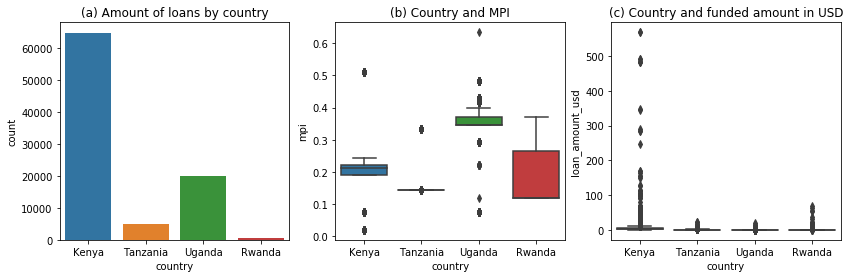

In [27]:
####HOW MANY Loans and Connection to MPI:
fig, axs = plt.subplots(ncols=3, sharex=True, figsize=(14,4))
sns.countplot(x='country', data=df_kiva, 
              ax=axs[0]).set_title('(a) Amount of loans by country')

sns.boxplot(x='country', y='mpi', data=df_kiva, 
            ax=axs[1]).set_title('(b) Country and MPI')

sns.boxplot(x='country', y='loan_amount_usd', data=df_kiva, 
            ax=axs[2]).set_title('(c) Country and funded amount in USD')
;  

Observations:

   1. Kenya has the most loans by a huge amount, followed by Uganda and Tanzania
   2. The connection between countries and MPI (b) should be further investigated
   3. There seems to be a problem regarding the funded loan (c). A lot of extreme point which make the graph not interpretable

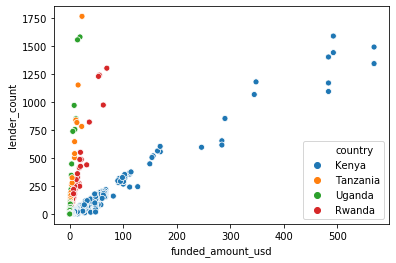

In [34]:
sns.scatterplot(x='funded_amount_usd', y='lender_count', hue='country',data=df_kiva);

#### 2 Closer look at categories/sectors:

''

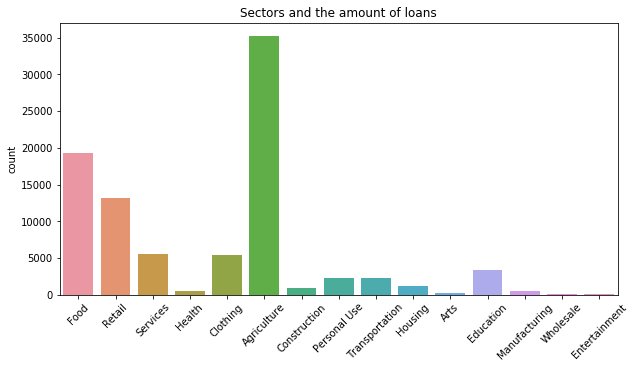

In [56]:
#### How many:
plt.figure(figsize=(10,5))
graph = sns.countplot(x='sector', data=df_kiva)
#rotate the x labels in order to improve readability
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
graph.set_title('Sectors and the amount of loans')
graph.set_xlabel('') #hide the x-label
;

Observations:
1. Agricalture has by far the most amount of loans, follwed by food and retail
2. Given the economic situation as well as my personal experience, this makes absolutely sense

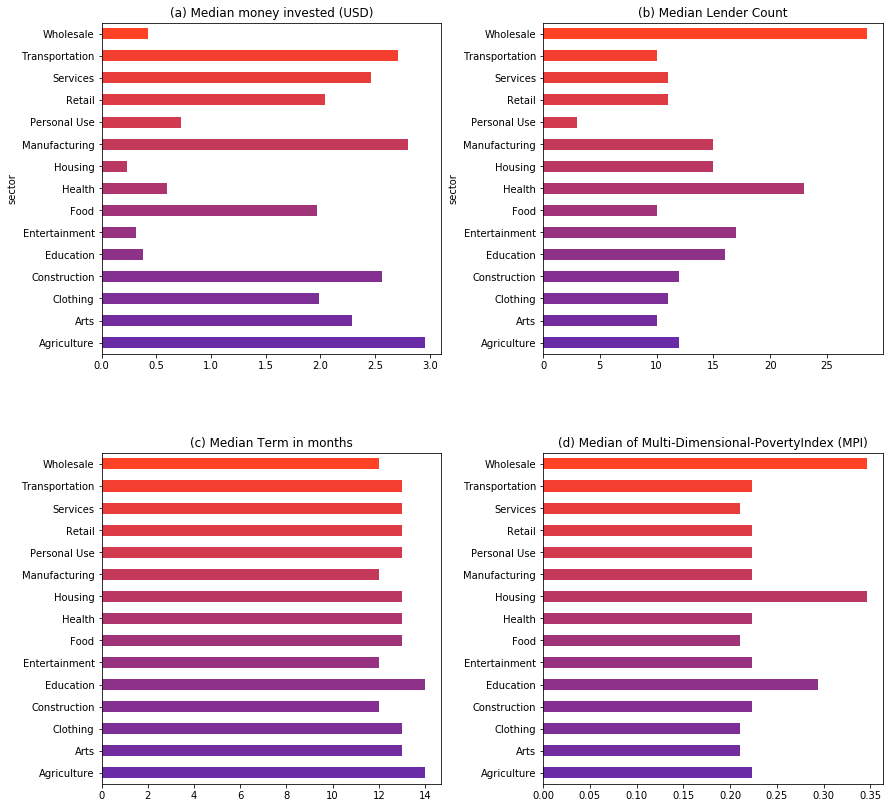

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(14,14))

color = cm.CMRmap(np.linspace(0.3,0.5,df_kiva.sector.nunique()))


df_kiva.groupby('sector').funded_amount_usd.median().plot(kind='barh', ax=ax1, color=color)
ax1.set_title('(a) Median money invested (USD)')
ax1.set_xlabel('')

df_kiva.groupby('sector').lender_count.median().plot(kind='barh', ax=ax2, color=color)
ax2.set_title('(b) Median Lender Count')
ax2.set_xlabel('')

df_kiva.groupby('sector').term_in_months.median().plot(kind='barh', ax=ax3, color=color)
ax3.set_title('(c) Median Term in months')
ax3.set_xlabel('')
ax3.set_ylabel('')

df_kiva.groupby('sector').mpi.median().plot(kind='barh', ax=ax4, color=color)
ax4.set_title('(d) Median of Multi-Dimensional-PovertyIndex (MPI)')
ax4.set_xlabel('')
ax4.set_ylabel('')

fig.subplots_adjust(hspace=0.3, wspace=0.3)
plt.show()

Observations:
1. Wholesale, Health, Housing & Entertainment seem have the highest median in terms of funded loan and lender count
2. There seems to be a strong correlation between both, a higher fundet amount is more or less equal to a higher lender count (comes not as a suprise)
3. Median terms in month is more or less equally distributed between the categories
4. The median of the MPI is higher regarding Education, Housing, and Wholesale (MIP just has 23 expressions throughout the dataset, **this could be missleading, further investigation with a better target variable)**

#### 3 Closer look at repayment interval

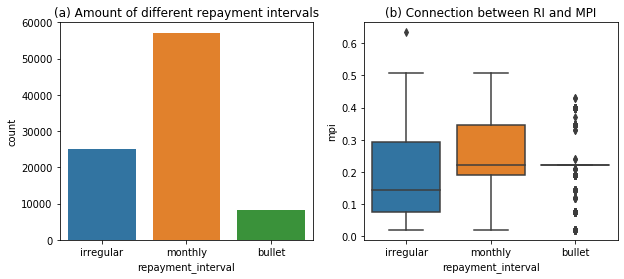

In [80]:
####HOW MANY and Connection to MPI:
fig, axs = plt.subplots(ncols=2, sharex=True, figsize=(10,4))
sns.countplot(x='repayment_interval', data=df_kiva, 
              ax=axs[0]).set_title('(a) Amount of different repayment intervals')

sns.boxplot(x='repayment_interval', y='mpi', data=df_kiva, 
            ax=axs[1]).set_title('(b) Connection between RI and MPI');          

Observations:
   1. (a) Regarding the repayment inteval, there are 3 different types in general:
         a Irregular
         b Monthly
         c bullet
   2. (a) The most common repayment is monthly followed by irregular and bullet
   3. (b) The median of the mpi seems to be higher (people are on average poorer) for the monthly method as for the irregular method:
   
   **This does not make much sense, but as i mentioned earlier:**
          * There is a problem with the target variable
          * Nevertheless, the intervals should be further investigated

#### 4 Visualizing the description (use):

In [ ]:
## Adding wordcloud for the description (use)
# from wordcloud import WordCloud

#### 5 Closer Look at gender

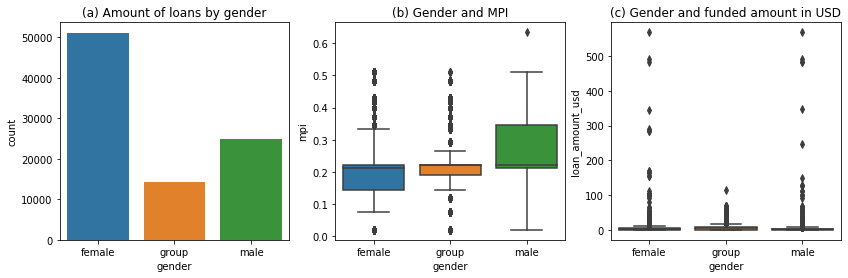

In [41]:
####HOW MANY nd Connection to MPI:
fig, axs = plt.subplots(ncols=3, sharex=True, figsize=(14,4))
sns.countplot(x='gender', data=df_kiva, 
              ax=axs[0]).set_title('(a) Amount of loans by gender')

sns.boxplot(x='gender', y='mpi', data=df_kiva, 
            ax=axs[1]).set_title('(b) Gender and MPI')

sns.boxplot(x='gender', y='loan_amount_usd', data=df_kiva, 
            ax=axs[2]).set_title('(c) Gender and funded amount in USD');

Observations:
   * Most of the loans provided by kiva is given to women (a)
   * (b) There seems to by a relationship between gender and MPI, females seem to be on average 'poorer'
   * (c) not interpetable due to extreme points -> **Before Modeling: StandardScaler has to be applied**

In [1]:
plt.figure(figsize=(10,5))
x,y = 'sector', 'gender'

(df_kiva
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'));

NameError: name 'plt' is not defined

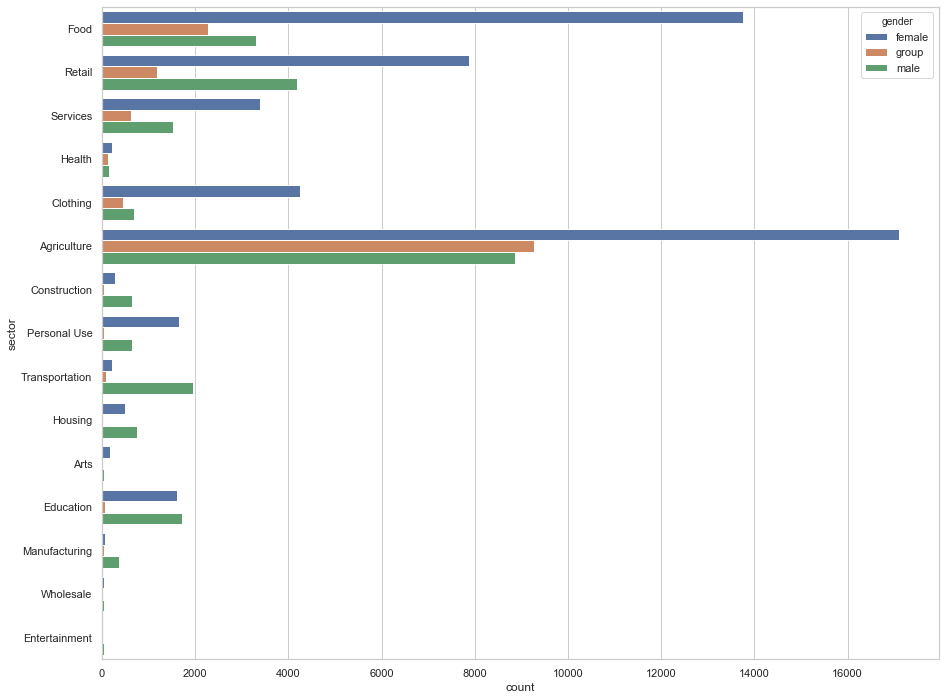

In [44]:
sns.set(style='whitegrid', rc={'figure.figsize':(15,12)})
sns.countplot(y="sector", hue='gender', data=df_kiva);

#### 6 Geographical Representation -> look at External Data - Mining and EDA

#### 7 Relationship between features and target variable (MPI)

* done in seperate Notebook after FE and Preprocessing
* to visualise the relationships correctly: one has to do one-hot encoding first